<a href="https://colab.research.google.com/github/samyumobi/Random-forest/blob/main/Bicycle_demand_estimation_using_random_forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, 
explained_variance_score


In [2]:
df = pd.read_csv('/content/drive/MyDrive/AI_ML_Git/RF/bike_data.csv - Sheet1.csv')
df.head(3)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801


In [3]:
## Make the first row data as new header

new_header = df.iloc[0]
df = df[1:]
df.columns = new_header


In [4]:
df.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


In [5]:
feature_names = list(df.columns)
print(feature_names)

['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


In [21]:
X = df.iloc[:,2:14].values
# X = df.iloc[:,2:15].values
# X = df.iloc[:,2:13].values
y = df.iloc[:,-1].values


In [22]:

xtrain, xtest, ytrain,ytest = train_test_split(X,y , test_size = 0.33)

reg = RandomForestRegressor(n_estimators= 1000, max_depth = 10)
reg.fit(xtrain, ytrain)
ypred = reg.predict(xtest)

In [23]:

mse = mean_squared_error(ytest, ypred)
evs = explained_variance_score(ytest, ypred)
print('#### Random Forest regressor performance ####')
print('Mean squared error = ', round(mse,2))
print('Explained variance score = ', round(evs,2))


#### Random Forest regressor performance ####
Mean squared error =  292271.63
Explained variance score =  0.92


In [24]:
### Extract feature importance

fi = reg.feature_importances_
# fi = 100.0 * (fi / max(fi))
indices = np.argsort(fi)
# pos = np.arange(index_sorted.shape[0]) + 0.5

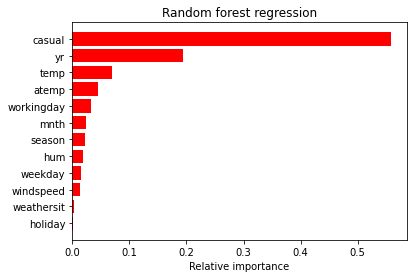

In [25]:
## Visualize the results
plt.figure()
plt.barh(range(len(indices)),fi[indices],color='r',align = 'center')
# plt.bar(pos, fi[index_sorted], align = 'center')
plt.yticks(range(len(indices)),[feature_names[2:][i] for i in indices])
plt.xlabel('Relative importance')
plt.title('Random forest regression')
plt.show()

**Observation:**

1. The feature year, temperature and season is most important factor in bicycle sales. 

  ie : X = columns 2, 13

2. The feature registered and casual are overall most important features in estimation of bicycle sales.

  ie: X = columns between 2 to 15

3. The feature year and casual are most important features in estimation of bicycle sales.

  ie: X = columns between 2 to 14





**Summary**

First important feature is casual (ie: hour) , year followed by temperature and season. 